**TravClan - Empowering Travel Agents with Technology**

TravClan is a B2B travel technology startup that enables travel agents to book flights, hotels, and holiday packages at competitive prices. Founded in 2018 and headquartered in Delhi, India, TravClan aims to digitize the travel industry by providing agents with the tools and resources needed to operate efficiently in a digital-first world.

Mission:
To empower travel agents globally by providing them with technology-driven solutions that enhance their business operations and customer offerings.

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import warnings
warnings.filterwarnings('ignore')

<ipython-input-2-e56664d87ad8>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.7 MB/s eta 0:00:00


In [4]:
#Load Dataset
data = pd.read_csv("/content/Travclan_python_test_dataset_flights_6months.csv")
data

,buyer_id,supplier_id,to_airport,from_airport,journey_type,pax,costprice,markup,selling_price,booking_date,payment_method,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?
0,492,3,CCU,ATL,round trip,4,422.296189,92.138566,537.469396,3/1/2024,PayPal,Yes,369.648995,Web,confirmed,4/3/2024,5.374694,0.000000,No
1,299,3,HYD,HYD,round trip,2,692.981884,375.363227,1162.185918,3/1/2024,Credit Card,Yes,799.302917,Web,confirmed,14-05-2023,11.621859,0.000000,No
2,64,4,BLR,SEA,one way,3,797.788149,404.749466,1303.724982,3/1/2024,Bank Transfer,Yes,896.647571,Web,confirmed,26-09-2023,0.000000,0.000000,No
3,345,6,DEL,DEN,one way,2,286.472882,92.202248,363.308088,3/1/2024,Credit Card,Yes,249.868124,Android,confirmed,17-10-2024,0.000000,9.220225,Yes
4,31,6,DEL,BOM,one way,4,840.560581,173.595343,1057.554760,3/1/2024,Debit Card,Yes,727.341978,Web,confirmed,11/9/2023,0.000000,0.000000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32235,464,4,MAA,GOI,one way,2,688.935969,183.758018,842.067651,8/30/2024,Bank Transfer,No,0.000000,Android,confirmed,31-12-2024,0.000000,18.375802,Yes
32236,81,5,BLR,MAA,round trip,5,720.057417,205.006114,976.315059,8/30/2024,Bank Transfer,No,0.000000,Web,confirmed,4/11/2023,0.000000,0.000000,No
32237,417,7,LAX,CCU,round trip,5,879.642914,577.284240,1360.713114,8/30/2024,Credit Card,Yes,935.841628,iOS,confirmed,29-09-2024,0.000000,57.728424,Yes
32238,58,3,DEL,MAA,round trip,5,595.340891,298.833362,844.368692,8/30/2024,Debit Card,Yes,580.721508,Android,failed,19-07-2024,8.443687,0.000000,No


In [4]:
data.shape

(32240, 19)

In [6]:
data.head()

,buyer_id,supplier_id,to_airport,from_airport,journey_type,pax,costprice,markup,selling_price,booking_date,payment_method,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?
0,492,3,CCU,ATL,round trip,4,422.296189,92.138566,537.469396,3/1/2024,PayPal,Yes,369.648995,Web,confirmed,4/3/2024,5.374694,0.000000,No
1,299,3,HYD,HYD,round trip,2,692.981884,375.363227,1162.185918,3/1/2024,Credit Card,Yes,799.302917,Web,confirmed,14-05-2023,11.621859,0.000000,No
2,64,4,BLR,SEA,one way,3,797.788149,404.749466,1303.724982,3/1/2024,Bank Transfer,Yes,896.647571,Web,confirmed,26-09-2023,0.000000,0.000000,No
3,345,6,DEL,DEN,one way,2,286.472882,92.202248,363.308088,3/1/2024,Credit Card,Yes,249.868124,Android,confirmed,17-10-2024,0.000000,9.220225,Yes
4,31,6,DEL,BOM,one way,4,840.560581,173.595343,1057.554760,3/1/2024,Debit Card,Yes,727.341978,Web,confirmed,11/9/2023,0.000000,0.000000,No


In [8]:
data.describe()

,buyer_id,supplier_id,pax,costprice,markup,selling_price,refund_amount,cashback,coupon_redeem
count,32240.000000,32240.000000,32240.000000,32240.000000,32240.000000,32240.000000,32240.000000,32240.000000,32240.000000
mean,249.198728,4.132351,2.995440,534.454208,214.911897,749.185111,321.169098,1.800790,7.230413
std,144.847428,1.987509,1.414173,280.406808,176.536047,414.305052,339.865111,3.790310,13.746741
min,1.000000,1.000000,1.000000,50.005653,-51.478750,50.766206,0.000000,0.000000,-5.147875
25%,123.000000,2.000000,2.000000,292.391617,78.381381,399.945463,0.000000,0.000000,0.000000
50%,248.000000,4.000000,3.000000,533.950333,171.356857,729.318731,221.482908,0.000000,0.000000
75%,374.000000,6.000000,4.000000,773.706987,305.323878,1062.007949,593.005610,0.000000,8.969851
max,499.000000,7.000000,5.000000,1150.283064,1197.747825,2126.801346,1462.725105,21.268013,91.593305


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32240 entries, 0 to 32239
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   buyer_id            32240 non-null  int64  
 1   supplier_id         32240 non-null  int64  
 2   to_airport          32240 non-null  object 
 3   from_airport        32240 non-null  object 
 4   journey_type        32240 non-null  object 
 5   pax                 32240 non-null  int64  
 6   costprice           32240 non-null  float64
 7   markup              32240 non-null  float64
 8   selling_price       32240 non-null  float64
 9   booking_date        32240 non-null  object 
 10  payment_method      32240 non-null  object 
 11  refund_status       32240 non-null  object 
 12  refund_amount       32240 non-null  float64
 13  channel_of_booking  32240 non-null  object 
 14  booking_status      32240 non-null  object 
 15  travel_date         32240 non-null  object 
 16  cash

In [10]:
#Duplicate Values
duplicates = len(data[data.duplicated()])
print(duplicates)

4


In [11]:
#Missing Values
data.isnull().sum()

,0
buyer_id,0
supplier_id,0
to_airport,0
from_airport,0
journey_type,0
pax,0
costprice,0
markup,0
selling_price,0
booking_date,0


<Axes: >

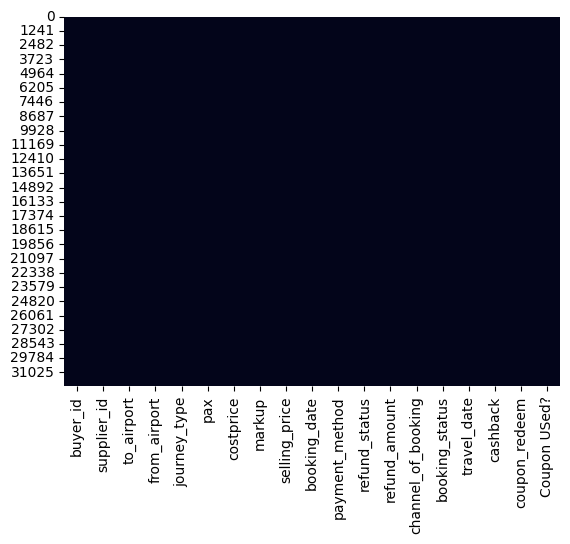

In [12]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cbar=False)

In [14]:
data.columns

Index(['buyer_id', 'supplier_id', 'to_airport', 'from_airport', 'journey_type',
       'pax', 'costprice', 'markup', 'selling_price', 'booking_date',
       'payment_method', 'refund_status', 'refund_amount',
       'channel_of_booking', 'booking_status', 'travel_date', 'cashback',
       'coupon_redeem', 'Coupon USed?'],
      dtype='object')

In [15]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in ",i,"is",data[i].nunique(),".")

No. of unique values in  buyer_id is 499 .
No. of unique values in  supplier_id is 7 .
No. of unique values in  to_airport is 20 .
No. of unique values in  from_airport is 20 .
No. of unique values in  journey_type is 2 .
No. of unique values in  pax is 5 .
No. of unique values in  costprice is 27559 .
No. of unique values in  markup is 29866 .
No. of unique values in  selling_price is 27558 .
No. of unique values in  booking_date is 184 .
No. of unique values in  payment_method is 4 .
No. of unique values in  refund_status is 2 .
No. of unique values in  refund_amount is 17066 .
No. of unique values in  channel_of_booking is 3 .
No. of unique values in  booking_status is 3 .
No. of unique values in  travel_date is 731 .
No. of unique values in  cashback is 7798 .
No. of unique values in  coupon_redeem is 10596 .
No. of unique values in  Coupon USed? is 2 .


In [16]:
# Dropping the duplicates
data.drop(duplicates, inplace = True)

In [8]:
# Convert 'date' column to datetime format
data['travel_date'] = pd.to_datetime(data['travel_date'], errors='coerce')

# Verify the datatype change
print(data.dtypes)

buyer_id                       int64
supplier_id                    int64
to_airport                    object
from_airport                  object
journey_type                  object
pax                            int64
costprice                    float64
markup                       float64
selling_price                float64
booking_date                  object
payment_method                object
refund_status                 object
refund_amount                float64
channel_of_booking            object
booking_status                object
travel_date           datetime64[ns]
cashback                     float64
coupon_redeem                float64
Coupon USed?                  object
route                         object
dtype: object


In [9]:
# Convert 'date' column to datetime format
data['booking_date'] = pd.to_datetime(data['booking_date'], errors='coerce')

# Verify the datatype change
print(data.dtypes)

buyer_id                       int64
supplier_id                    int64
to_airport                    object
from_airport                  object
journey_type                  object
pax                            int64
costprice                    float64
markup                       float64
selling_price                float64
booking_date          datetime64[ns]
payment_method                object
refund_status                 object
refund_amount                float64
channel_of_booking            object
booking_status                object
travel_date           datetime64[ns]
cashback                     float64
coupon_redeem                float64
Coupon USed?                  object
route                         object
dtype: object


**Exploratory Data Analysis (EDA)**

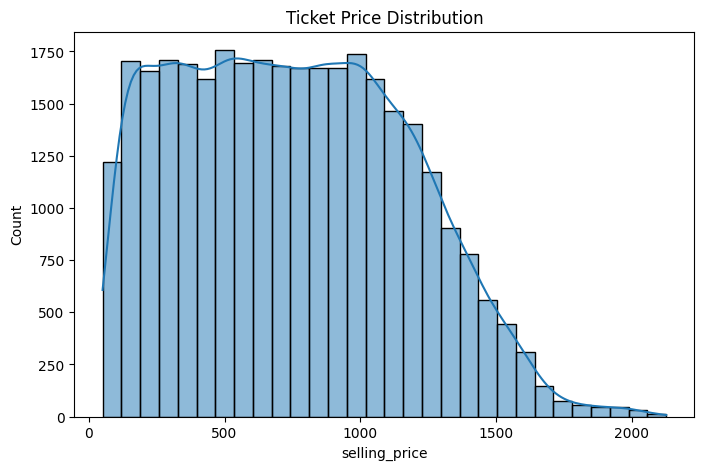

In [19]:
# Distribution of ticket prices
plt.figure(figsize=(8, 5))
sns.histplot(data['selling_price'], bins=30, kde=True)
plt.title("Ticket Price Distribution")
plt.show()

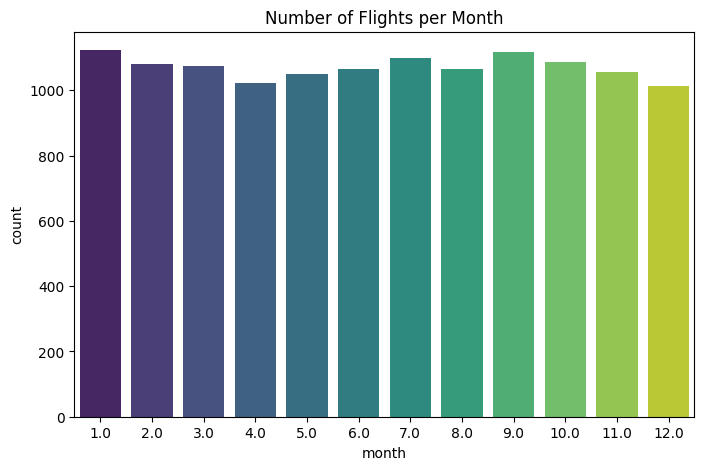

In [27]:
# Count of flights per month
data['travel_date'] = pd.to_datetime(data['travel_date'])
data['month'] = data['travel_date'].dt.month

plt.figure(figsize=(8, 5))
sns.countplot(x='month', data=data, palette='viridis')
plt.title("Number of Flights per Month")
plt.show()


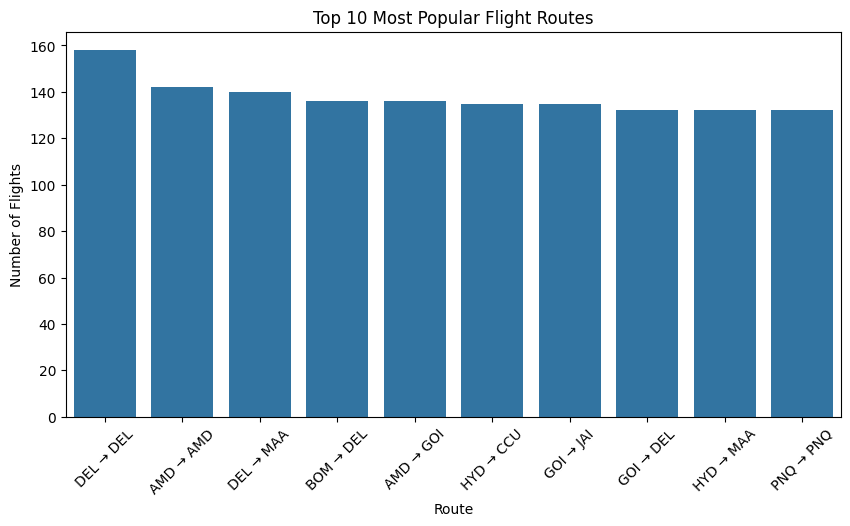

In [6]:
# Top 10 flight routes

data['route'] = data['from_airport'] + " → " + data['to_airport']
top_routes = data['route'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_routes.index, y=top_routes.values)
plt.xticks(rotation=45)
plt.xlabel("Route")
plt.ylabel("Number of Flights")
plt.title("Top 10 Most Popular Flight Routes")
plt.show()

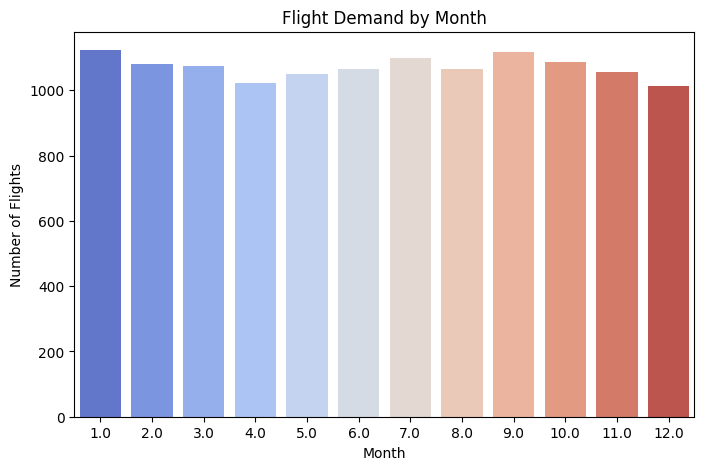

In [10]:
data['month'] = data['travel_date'].dt.month
monthly_flights = data['month'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_flights.index, y=monthly_flights.values, palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.title("Flight Demand by Month")
plt.show()


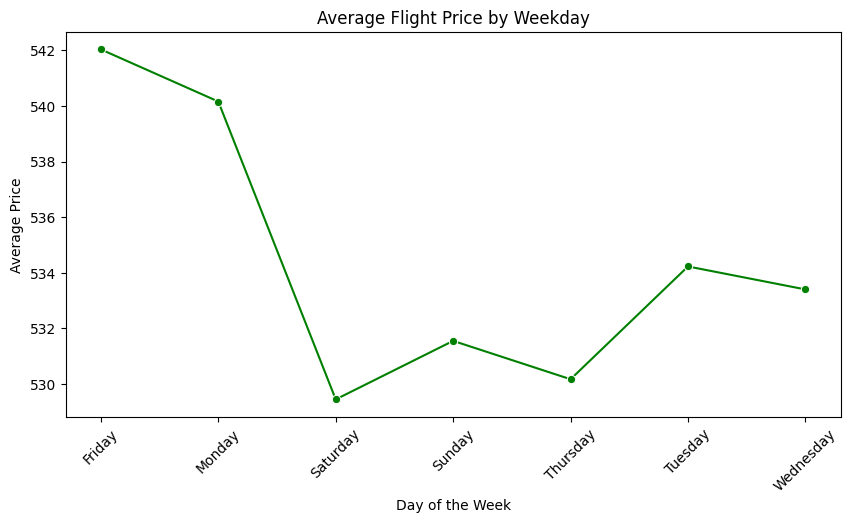

In [13]:
# Weekday vs. Ticket Prices

data['weekday'] = data['booking_date'].dt.day_name()
avg_price_per_weekday = data.groupby('weekday')['costprice'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_price_per_weekday.index, y=avg_price_per_weekday.values, marker="o", color="green")
plt.xlabel("Day of the Week")
plt.ylabel("Average Price")
plt.title("Average Flight Price by Weekday")
plt.xticks(rotation=45)
plt.show()


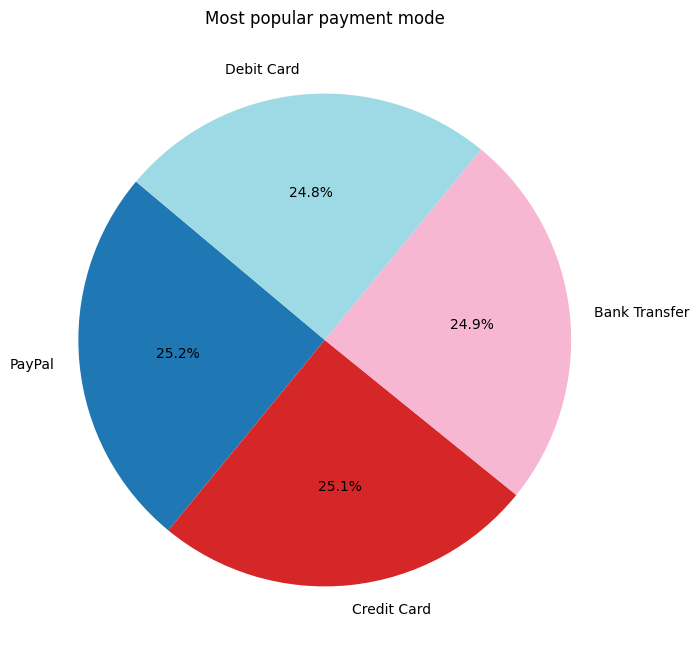

In [15]:
# Most popular payment mode

# Count the occurrences of each payment mode
payment_mode_counts = data['payment_method'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
payment_mode_counts.plot.pie(autopct='%1.1f%%', startangle=140, cmap='tab20', labels= payment_mode_counts.index)
plt.title('Most popular payment mode')
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.show()